# Convelution Nural Network 

**Image Featuring and Classification**

In [138]:
# import ilbraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Dense, Flatten


In [139]:
#(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
#X_train.shape, X_test.shape

In [158]:
import openml
from sklearn.model_selection import train_test_split

# Load the dataset using its OpenML ID
dataset = openml.datasets.get_dataset(40927)  # Dataset ID 40927 on OpenML

# Retrieve the data (features and target column)
X, y, _, _ = dataset.get_data(target=dataset.default_target_attribute)



In [161]:
print(X.head())
print(X.shape)

print(y.head())
print(y.shape)

    a0   a1   a2   a3   a4   a5  ...  a3066  a3067  a3068  a3069  a3070  a3071
0   26   17   13   13   13   14  ...     29     46     28     27     26     27
1   94  101   95   94   94   97  ...    152    163    174    182    184    155
2  183  158  166  167  169  171  ...    250    250    250    250    250    250
3  255  254  255  255  255  255  ...    255    255    255    255    255    255
4  182  156  156  144  118  132  ...     79     72     68     73     67     75

[5 rows x 3072 columns]
(60000, 3072)
0    8
1    5
2    0
3    6
4    9
Name: class, dtype: category
Categories (10, object): ['0' < '1' < '2' < '3' ... '6' < '7' < '8' < '9']
(60000,)


In [162]:
# here the data is converted to numpy array bcs it is in the form all three color channels are stored in  the featues in the data set


X = X.to_numpy().reshape(-1, 32, 32, 3)
y= y.to_numpy().reshape(-1,1)




In [163]:

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.166666, random_state=42)

# Print the shapes of the training and test sets
print(f"Training Features: {X_train.shape}")
print(f"Training Labels: {y_train.shape}")
print(f"Test Features: {X_test.shape}")
print(f"Test Labels: {y_test.shape}")

Training Features: (50000, 32, 32, 3)
Training Labels: (50000, 1)
Test Features: (10000, 32, 32, 3)
Test Labels: (10000, 1)


In [164]:
# and the y is in the form of labels all the integers stored as strings

y_train = np.vectorize(int)(y_train)
y_test = np.vectorize(int)(y_test)
print(y_test[:5])
print(y_train[:5])

[[6]
 [8]
 [8]
 [0]
 [8]]
[[9]
 [1]
 [7]
 [0]
 [8]]


In [145]:
X_test.shape

(10000, 32, 32, 3)

In [146]:
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)
y_train[:5]

array([9, 1, 7, 0, 8])

In [147]:
classes = ["airplane", "car", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

print(classes)

['airplane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [148]:
def plot_sample(X, y, index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

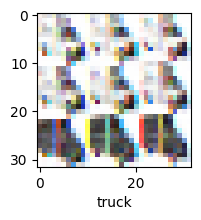

In [149]:
plot_sample(X_train, y_train, 0)

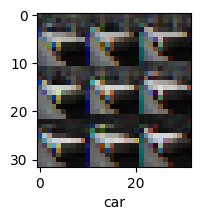

In [150]:
plot_sample(X_train, y_train, 1)

In [151]:
X_train[0]

array([[[247, 239, 234],
        [227, 221, 217],
        [218, 221, 230],
        ...,
        [253, 254, 254],
        [254, 254, 253],
        [253, 254, 254]],

       [[243, 232, 236],
        [245, 247, 248],
        [252, 254, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[243, 234, 225],
        [221, 207, 212],
        [238, 253, 253],
        ...,
        [243, 250, 251],
        [254, 255, 255],
        [255, 255, 255]],

       ...,

       [[254, 251, 242],
        [184, 121,  18],
        [ 70, 191, 187],
        ...,
        [ 55,  42,  40],
        [ 41,  40,  63],
        [189, 218, 221]],

       [[255, 253, 253],
        [252, 248, 248],
        [250, 251, 254],
        ...,
        [190, 196, 188],
        [174, 200, 212],
        [211, 220, 244]],

       [[255, 253, 254],
        [251, 250, 251],
        [252, 254, 254],
        ...,
        [252, 253, 253],
        [251, 252, 252],
        [251, 253, 253]]

In [152]:
# notmalizing the data
X_train = X_train / 255.0
X_test = X_test / 255.0

X_train[0]

array([[[0.96862745, 0.9372549 , 0.91764706],
        [0.89019608, 0.86666667, 0.85098039],
        [0.85490196, 0.86666667, 0.90196078],
        ...,
        [0.99215686, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99215686],
        [0.99215686, 0.99607843, 0.99607843]],

       [[0.95294118, 0.90980392, 0.9254902 ],
        [0.96078431, 0.96862745, 0.97254902],
        [0.98823529, 0.99607843, 0.99607843],
        ...,
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843]],

       [[0.95294118, 0.91764706, 0.88235294],
        [0.86666667, 0.81176471, 0.83137255],
        [0.93333333, 0.99215686, 0.99215686],
        ...,
        [0.95294118, 0.98039216, 0.98431373],
        [0.99607843, 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       ...,

       [[0.99607843, 0.98431373, 0.94901961],
        [0.72156863, 0.4745098 , 0.07058824],
        [0.2745098 , 0

In [153]:
y_train[:5]

array([9, 1, 7, 0, 8])

In [165]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(100, activation='sigmoid'),
])
ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)


/home/muhammed-shafeeh/AI_ML/Ai-and-Ml/.venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 45s 29ms/step - accuracy: 0.0996 - loss: nan
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 47s 30ms/step - accuracy: 0.0997 - loss: nan
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 48s 31ms/step - accuracy: 0.1016 - loss: nan
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 46s 29ms/step - accuracy: 0.1019 - loss: nan
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 47s 30ms/step - accuracy: 0.0999 - loss: nan


In [166]:
ann.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.1026 - loss: nan


[nan, 0.10080000013113022]

In [167]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = ann.predict(X_test)
y_pred = ann.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
print("classification report: \n", classification_report(y_test, y_pred))
print(y_pred[:5])
print(y_test[:5])
#print("classification report: \n", classification_report(y_test, y_pred))

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step
classification report: 
               precision    recall  f1-score   support

           0       0.10      1.00      0.18      1008
           1       0.00      0.00      0.00       995
           2       0.00      0.00      0.00      1041
           3       0.00      0.00      0.00      1003
           4       0.00      0.00      0.00       967
           5       0.00      0.00      0.00       988
           6       0.00      0.00      0.00       990
           7       0.00      0.00      0.00      1058
           8       0.00      0.00      0.00       975
           9       0.00      0.00      0.00       975

    accuracy                           0.10     10000
   macro avg       0.01      0.10      0.02     10000
weighted avg       0.01      0.10      0.02     10000

[0 0 0 0 0]
[[6]
 [8]
 [8]
 [0]
 [8]]


/home/muhammed-shafeeh/AI_ML/Ai-and-Ml/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/muhammed-shafeeh/AI_ML/Ai-and-Ml/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/muhammed-shafeeh/AI_ML/Ai-and-Ml/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

**Pooling Layers**

In [168]:
cnn = models.Sequential([
    
    
    #cnn
    layers.Conv2D(filters=32, kernel_size = (3,3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    #dense
   
    layers.Flatten(),
    
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax'),
])

/home/muhammed-shafeeh/AI_ML/Ai-and-Ml/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [170]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

cnn.fit(X_train, y_train, epochs=10)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.1046 - loss: 4.0311
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.0975 - loss: 2.3026
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.0994 - loss: 2.3032
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.0991 - loss: 2.3029
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.1017 - loss: 2.3027
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.0972 - loss: 2.3028
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.0960 - loss: 2.3028
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.0966 - loss: 2.3028
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.0958 - loss: 2.3028
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.1010 - loss: 2.3027


In [171]:
cnn.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1017 - loss: 2.3028


[2.3028881549835205, 0.10029999911785126]

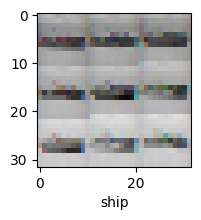

In [178]:
y_test = y_test.reshape(-1,)
plot_sample(X_test, y_test, 1)

In [173]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([[0.09976213, 0.10036969, 0.09908125, 0.1029586 , 0.10080069,
        0.10008366, 0.09936823, 0.09751515, 0.10135711, 0.09870349],
       [0.09976213, 0.10036969, 0.09908125, 0.1029586 , 0.10080069,
        0.10008366, 0.09936823, 0.09751515, 0.10135711, 0.09870349],
       [0.09976213, 0.10036969, 0.09908125, 0.1029586 , 0.10080069,
        0.10008366, 0.09936823, 0.09751515, 0.10135711, 0.09870349],
       [0.09976213, 0.10036969, 0.09908125, 0.1029586 , 0.10080069,
        0.10008366, 0.09936823, 0.09751515, 0.10135711, 0.09870349],
       [0.09976213, 0.10036969, 0.09908125, 0.1029586 , 0.10080069,
        0.10008366, 0.09936823, 0.09751515, 0.10135711, 0.09870349]],
      dtype=float32)

In [174]:
y_pred = np.argmax(y_pred, axis=1)

In [175]:
y_pred[:5]

array([3, 3, 3, 3, 3])

In [176]:
y_test[:5]

array([[6],
       [8],
       [8],
       [0],
       [8]])

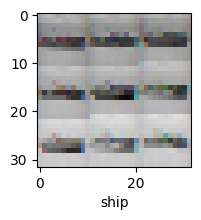

In [179]:
plot_sample(X_test, y_test, 1)

In [180]:
y_pred[1]
classes[y_pred[1]]


'cat'

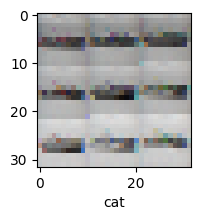

In [181]:
plot_sample(X_test, y_pred, 1)